# K-Nearest Neighbor Classification

## The dataset used is the Pima Indians Diabetes Database

### The purpose of this analysis is to build a Machine Learning model Logistic Regression to accurately predict whether patients in the dataset suffer from diabetes or not by using independent variables that influence the patient's decision to diagnose diabetes or not.


#### Import Dataset and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

%matplotlib inline

In [2]:
data = pd.read_csv('F:\Learn Python\Data\diabetes.csv')
data.isnull().values.any()

False

In [3]:
print(data.columns.values)

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
data.shape

(768, 9)

### Data Exploration

In [7]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
l=list(data.columns)
l[0:len(l)-2]

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction']

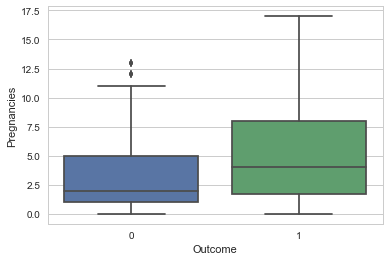

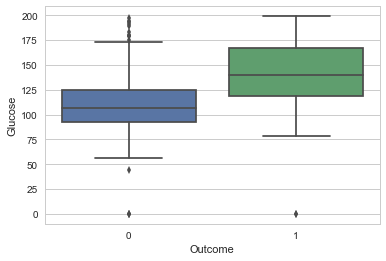

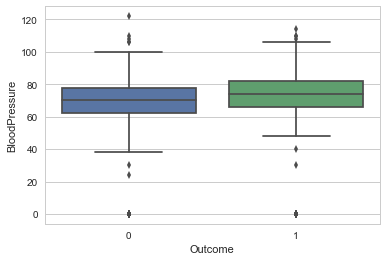

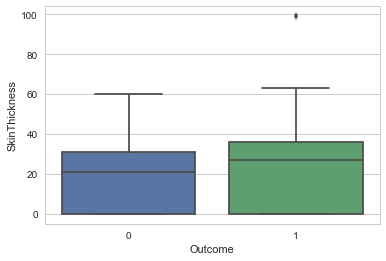

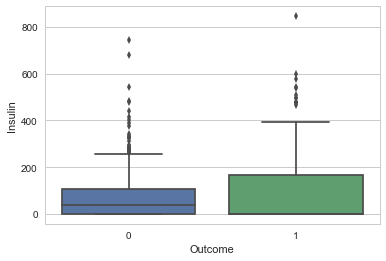

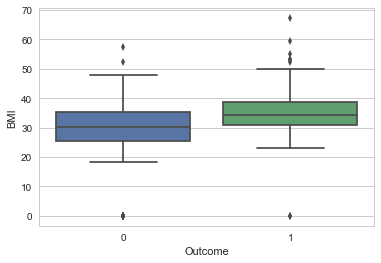

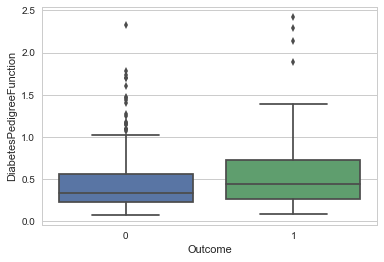

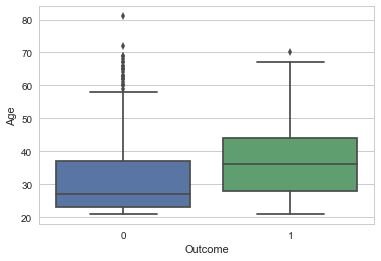

In [9]:
for i in range(len(l)-1):
    sns.boxplot(x='Outcome',y=l[i], data=data)
    plt.figure()
plt.show()

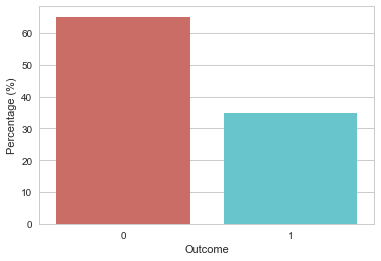

In [10]:
sns.barplot(x ='Outcome',y='Outcome', data = data, estimator = lambda x: len(x)/len(data)*100, palette = 'hls').\
set(ylabel='Percentage (%)')
plt.show()

In [11]:
data_positive = data.where(data['Outcome']==1).dropna()
data_negative = data.where(data['Outcome']==0).dropna()

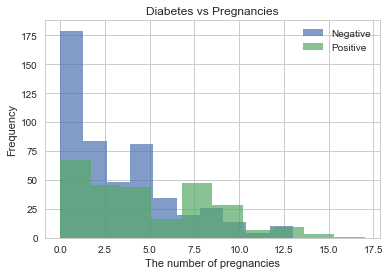

In [12]:
plt.hist(data_negative.Pregnancies, alpha = 0.7, label = 'Negative')
plt.hist(data_positive.Pregnancies, alpha = 0.7, label = 'Positive')
plt.title('Diabetes vs Pregnancies')
plt.xlabel('The number of pregnancies')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

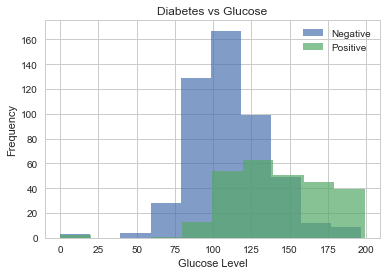

In [13]:
plt.hist(data_negative.Glucose, alpha = 0.7, label = 'Negative')
plt.hist(data_positive.Glucose, alpha = 0.7, label = 'Positive')
plt.title('Diabetes vs Glucose')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

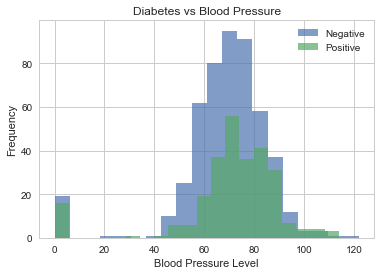

In [14]:
plt.hist(data_negative.BloodPressure, bins =20, alpha = 0.7, label = 'Negative')
plt.hist(data_positive.BloodPressure, bins =20, alpha = 0.7, label = 'Positive')
plt.title('Diabetes vs Blood Pressure')
plt.xlabel('Blood Pressure Level')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

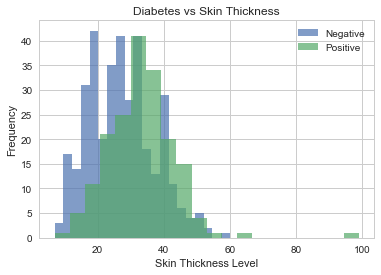

In [15]:
plt.hist(data_negative.SkinThickness[data_negative.SkinThickness>0], bins =20, alpha = 0.7, label = 'Negative')
plt.hist(data_positive.SkinThickness[data_positive.SkinThickness>0], bins =20, alpha = 0.7, label = 'Positive')
plt.title('Diabetes vs Skin Thickness')
plt.xlabel('Skin Thickness Level')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

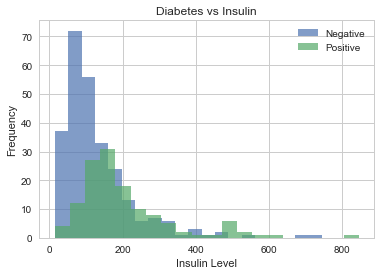

In [16]:
plt.hist(data_negative.Insulin[data_negative.Insulin>0], bins =20, alpha = 0.7, label = 'Negative')
plt.hist(data_positive.Insulin[data_positive.Insulin>0], bins =20, alpha = 0.7, label = 'Positive')
plt.title('Diabetes vs Insulin')
plt.xlabel('Insulin Level')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

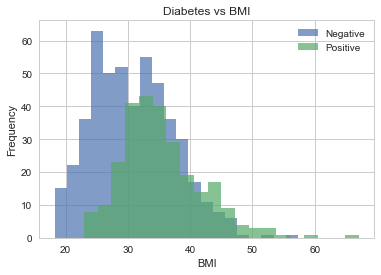

In [17]:
plt.hist(data_negative.BMI[data_negative.BMI>0], bins =20, alpha = 0.7, label = 'Negative')
plt.hist(data_positive.BMI[data_positive.BMI>0], bins =20, alpha = 0.7, label = 'Positive')
plt.title('Diabetes vs BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

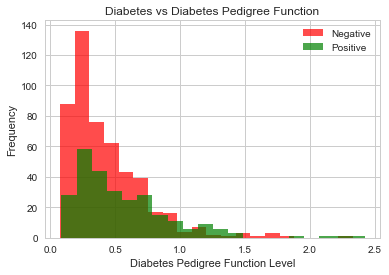

In [18]:
plt.hist(data_negative.DiabetesPedigreeFunction[data_negative.DiabetesPedigreeFunction>0], bins =20, alpha = 0.7,\
         label = 'Negative',color='red')
plt.hist(data_positive.DiabetesPedigreeFunction[data_positive.DiabetesPedigreeFunction>0], bins =20, alpha = 0.7, \
         label = 'Positive',color='green')
plt.title('Diabetes vs Diabetes Pedigree Function')
plt.xlabel('Diabetes Pedigree Function Level')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

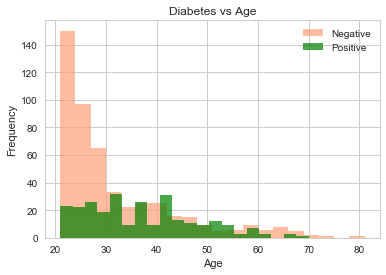

In [19]:
plt.hist(data_negative.Age[data_negative.Age>0], bins =20, alpha = 0.7, label = 'Negative',color='lightsalmon')
plt.hist(data_positive.Age[data_positive.Age>0], bins =20, alpha = 0.7, label = 'Positive', color = 'green')
plt.title('Diabetes vs Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

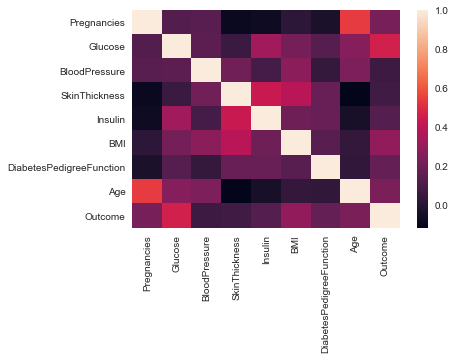

In [20]:
# Describe the correlation among features in dataset
sns.heatmap(data.corr())
plt.show()

### Classification data with KNN

In [21]:
X = data.iloc[:,:7]
y = data.iloc[:,8]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [24]:
y_pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)
print('Confusion matrix:\n',conf_matrix)
print('Accuracy of KNN classifier on test set: {:.3f}'.format(knn.score(X_test, y_test)))

Confusion matrix:
 [[99  8]
 [21 26]]
Accuracy of KNN classifier on test set: 0.812


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.82      0.93      0.87       107
          1       0.76      0.55      0.64        47

avg / total       0.81      0.81      0.80       154



In [26]:
print("Misclassification error rate:",round(np.mean(y_pred!=y_test),3))

Misclassification error rate: 0.188


#### Choosing 'k' by elbow method

In [27]:
error_rate = []

# Will take some time
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error (misclassification) Rate')

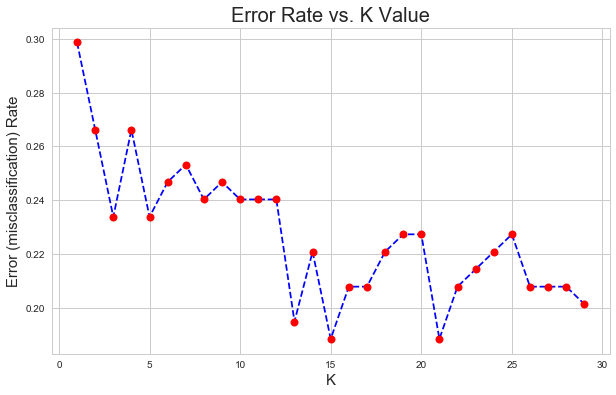

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error (misclassification) Rate',fontsize=15)

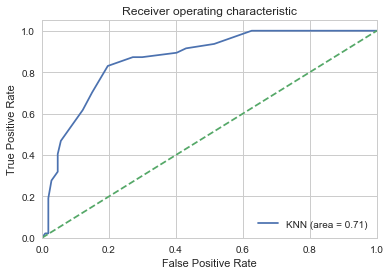

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
log_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % log_roc_auc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [30]:
from sklearn import metrics, model_selection
predicted = model_selection.cross_val_predict(knn, X, y, cv=10)
metrics.accuracy_score(y, predicted) 
print (metrics.classification_report(y, predicted) )

             precision    recall  f1-score   support

          0       0.74      0.89      0.81       500
          1       0.67      0.43      0.52       268

avg / total       0.72      0.73      0.71       768



In [31]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(knn, X, y, cv=10,scoring='accuracy')
print (accuracy)
print (cross_val_score(knn, X, y, cv=10,scoring='accuracy').mean())

[ 0.74025974  0.71428571  0.75324675  0.61038961  0.7012987   0.74025974
  0.71428571  0.80519481  0.75        0.75      ]
0.727922077922
